### Regner det mer når det er varmt eller når det er kaldt?

I denne oppgaven begynner vi med litt recap av ting vi har gått gjenom tidligere, jobber videre med funksjoner og figurer, og undersøker en naturvitenskapelig hypotese!

Et av hovedpoengene med denne oppgaven er å gi inspirasjon til hvordan man kan utforske et datasett, og bruke programmering sammen med naturfag.

Denne koden går gjennom disse stegene:
- Last inn en fil fra seklima.met.no på csv-format - samme format som dataene NAT624-studentene henter inn selv. 
- Lag figurer som presenterer dataene
- Beregn akkumulert nedbør og presenter dette i en figur
- Vurder om beregningen virker riktig
- Undersøk hypotesen: "Det regner mer når det er varmt".
- Lag figurer som viser flere variabler sammen: Er det en sammenheng mellom dem?
- Vurder resultene.

-------------

### Del 1: Last inn pakkene du trenger. 
Vi fortsetter å bruke disse tre pakkene:
- `pandas` er veldig god på noen typer datainnlesing, det er det vi bruker denne pakken til her, men den er også ofte nyttig f.eks. for å interpolere manglende verdier. 
- `matplotlib.pyplot` er (sannsynligvis) det aller mest brukte plotte-biblioteket. Med denne pakken kan du lage alt av linjeplot, histogram, scatterplot, kontur-plot, det meste du kan tenke deg. 
- `Numpy` er for "alt" av matematikk utover helt standard +-\*. Finne min og max, gjennomsnitt den slags, men kanskje aller viktigst vektor- og matriseoperasjoner.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Tips:** Cellen under er veldig praktisk å inkludere hvis du skal lage en del figurer. Den gjør at all lik type figur-tekst automatisk settes til samme størrelse. 

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# Endre denne stien til der du har EkteData filene på din PC
sti='W:/Work/Documents/EkteData/EkteData/data'
# Endre dette filnavnet til det du har kalt filen du nettopp lastet ned. 
fil='/sol_nedbør_temp.csv'


### Del 2: Bruk pandas til å lese csv-filen. 

Husk at du finner informasjon om hvordan man leser inn csv-filer i python i både forrige oppgave [Del4_les_csv_fil.ipynb](https://github.com/irendundas/EkteData/blob/main/NAT624/Del4_les_csv_fil.ipynb), i oversikten over [huskeregler](https://github.com/irendundas/EkteData/blob/main/Kom_i_gang/Huskeregler.ipynb), og i dokumentasjonen til funksjonen [her](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Vi kommer tilbake til hvordan man leser dokumentasjon seinere, men det er greit å vite at slike sider som dette er ekstremt nyttige når man skal finne ut av hvordan ulike funksjoner brukes. Og ofte er dokumentasjonen mye enklere enn den over, `pd.read_csv()` har ekstremt mange valg.

In [4]:
df = pd.read_csv(
    sti+fil, sep=';', decimal=',', parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True, 
    na_values='-'
)

`df` er nå en "Pandas DataFrame". Dette er en fin og oversiktlig måte å få oversikten over et datasett på. 

In [5]:
df

,Navn,Stasjon,Tid(norsk normaltid),Solskinnstid (døgn),Nedbør (døgn),Middeltemperatur (døgn)
0,Flesland,SN50500,2021-01-06,3.3,0.0,-4.3
1,Flesland,SN50500,2021-01-07,2.8,0.0,-1.4
2,Flesland,SN50500,2021-01-08,3.2,0.0,-2.5
3,Flesland,SN50500,2021-01-09,0.0,0.0,0.7
4,Flesland,SN50500,2021-01-10,0.0,12.1,0.4
...,...,...,...,...,...,...
362,Flesland,SN50500,2022-01-03,0.0,2.6,4.5
363,Flesland,SN50500,2022-01-04,0.0,12.8,3.2
364,Flesland,SN50500,2022-01-05,2.5,8.5,1.8
365,Flesland,SN50500,2022-01-06,0.0,0.0,NaN


De to siste linjene i denne DataFram-en inneholder ikke gyldige verdier. Vi redefinerer defor `df` slik at de to siste linjene utelukkes. Siden man angir navnet til kolonnen først og så hvilke rader man vil se på, blir `df[:][:-2]` "alle kolonner" (`[:]`), og "alle rader utenom de to siste" (`[:-2]`). 

In [6]:
df=df[:][:-2]
df

,Navn,Stasjon,Tid(norsk normaltid),Solskinnstid (døgn),Nedbør (døgn),Middeltemperatur (døgn)
0,Flesland,SN50500,2021-01-06,3.3,0.0,-4.3
1,Flesland,SN50500,2021-01-07,2.8,0.0,-1.4
2,Flesland,SN50500,2021-01-08,3.2,0.0,-2.5
3,Flesland,SN50500,2021-01-09,0.0,0.0,0.7
4,Flesland,SN50500,2021-01-10,0.0,12.1,0.4
...,...,...,...,...,...,...
360,Flesland,SN50500,2022-01-01,0.0,1.7,4.6
361,Flesland,SN50500,2022-01-02,0.0,4.9,7.5
362,Flesland,SN50500,2022-01-03,0.0,2.6,4.5
363,Flesland,SN50500,2022-01-04,0.0,12.8,3.2


### Del 3: Konverter Pandas DataFrame til Numpy Array

Vi vil konvertere Pandas DataFrame til et numpy array fordi plottebiblioteket matplotlib behandler f.eks. manglende verdier bedre enn de innebygde plotte-funksjonene til Pandas. Denne konverteringen er også praktisk hvis du f.eks. skal sammenligne et datasett som dette med et du har lest inn som numpy array. 

Hvis df er en DataFrame konverterer vi til numpy array med denne funksjonen: `df.to_numpy()`.

For å konvertere motsatt vei bruker man `pd.DataFrame(array)`, hvor "array" er et numpy array.

In [7]:
data=df.to_numpy()

In [8]:
print(data)
print(' ')
print('shape of array "data": ', data.shape)

[['Flesland' 'SN50500' Timestamp('2021-01-06 00:00:00') 3.3 0.0 -4.3]
 ['Flesland' 'SN50500' Timestamp('2021-01-07 00:00:00') 2.8 0.0 -1.4]
 ['Flesland' 'SN50500' Timestamp('2021-01-08 00:00:00') 3.2 0.0 -2.5]
 ...
 ['Flesland' 'SN50500' Timestamp('2022-01-03 00:00:00') 0.0 2.6 4.5]
 ['Flesland' 'SN50500' Timestamp('2022-01-04 00:00:00') 0.0 12.8 3.2]
 ['Flesland' 'SN50500' Timestamp('2022-01-05 00:00:00') 2.5 8.5 1.8]]
 
shape of array "data":  (365, 6)


### Del 4: Lagre dataene i nye variabler

Akkurat som i DataFramen er det 365 rader (en verdi per dag) og 6 kolonner (en for hver variabel/metadata). Når man vil se på en og en variabel av gangen er det ofte ryddig å lagre hver variabel fra matrisen til en *egen* variabel. Dette er det vi gjør i cellen under. 

`tid` er i kolonne nr 3. Siden Python starter indekseringen på 0 blir indeksen til kolonne 3 `2`. Derfor kan vi skrive `tid=data[:,2]` - alle radene tas med `:`, men kun kolonnen med indeks `2` tas med. Tilsvarende for soltimer, nedbør og temp. 

In [9]:
tid=data[:,2]
sol=data[:,3]
nedbør=data[:,4]
temp=data[:,5]

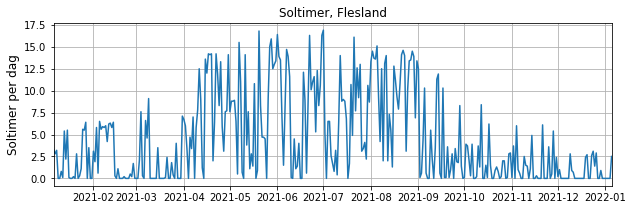

In [10]:
# Sett størrelsen på figuren: her er 10 bredden og 3 er høyden.
plt.figure(figsize=(10,3))
plt.plot(tid,sol)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.title('Soltimer, Flesland')
plt.ylabel('Soltimer per dag')
plt.show()

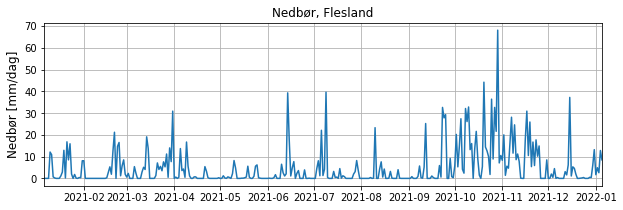

In [11]:
plt.figure(figsize=(10,3))
plt.plot(tid,nedbør)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.title('Nedbør, Flesland')
plt.ylabel('Nedbør [mm/dag]')
plt.show()

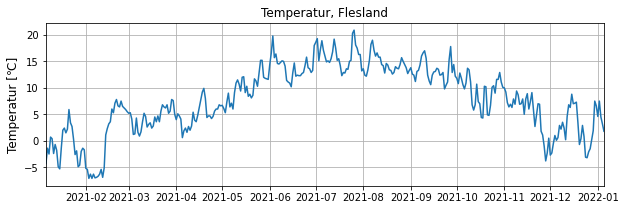

In [12]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.title('Temperatur, Flesland')
plt.ylabel('Temperatur [\u2103]')
plt.show()

## Oppgave 1

- Fjern `na_values='-'` i celle nr 3 der du leser inn datasettet med `pd.csv_read()`. 
- Kjør gjennom på nytt og se hva som skjer. Når du plotter figuren over temperatur blir det ganske tydelig at noe er galt. 
- Det var dette som gjorde at jeg selv oppdaget at noe var galt og skjønte at jeg måtte oppdatere noe i innlesningen av datasettet. Slik prøving og feiling skjer hele tiden i programmering. 

Et triks når du skal fjerne `na_values='-'` er å *kommentere ut* denne biten av koden. Det gjør man med `#`. I kodeceller blir alt med `#` foran ignorert. All turkis tekst i italic blir altså ignorert. Man kan skrive:

In [13]:
df = pd.read_csv(
    sti+fil, sep=';', decimal=',', parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True#, na_values='-'
)

**Kjør disse linjene igjen for å tilbakestille feilen vi introduserte i Oppgave 1**

In [14]:
df = pd.read_csv(
    sti+fil, sep=';', decimal=',', parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True, 
    na_values='-'
)
df=df[:][:-2]

data=df.to_numpy()

tid=data[:,2]
sol=data[:,3]
nedbør=data[:,4]
temp=data[:,5]

### Del 5: Beregninger med et datasett

Frem til nå har vi plottet dataene direkte, men vi kan også gjøre beregninger med dataene. Nedbør presenteres for eksempel ofte som akumulert nedbør, altså totalt hvor mye nedbør man har hatt så langt i år. 

Dette skal vi beregne nå, med tre forskjellige metoder.

Først - tenk på hva akumulert nedbør betyr: Første dag måler du hvor mye nedbør som falt. Nest dag måler du igjen, og du addere den nye mengden til hvor mye som falt i går. Dag tre måler du igjen, og igjen adderer du den nye mengden til summen fra dag en og dag 2. Og så videre - for hver dag adderer du den nye mengden til summen du har fra dagen før. 

In [15]:
x=np.array([4,2,6,8,3])
# Lag en array med kun 0
akkumulert_sum=np.zeros(5)
akkumulert_sum

array([0., 0., 0., 0., 0.])

In [16]:
akkumulert_sum[0]=x[0]
akkumulert_sum[1]=akkumulert_sum[0]+x[1]
akkumulert_sum[2]=akkumulert_sum[1]+x[2]
akkumulert_sum[3]=akkumulert_sum[2]+x[3]
akkumulert_sum[4]=akkumulert_sum[3]+x[4]
akkumulert_sum

array([ 4.,  6., 12., 20., 23.])

På det ekte datasettet vårt kan vi gjøre tilsvarende. I metode 1 og 2 bruker vi *for-løkker*. Det har vi ikke gått gjennom enda, det kommer i [Del8_forløkker_og_feilsøking](https://github.com/irendundas/EkteData/blob/main/NAT624/Del7_forl%C3%B8kker_og_feils%C3%B8king.ipynb). Hovedpoenget akkurat nå er ikke å skjønne hvordan for-løkken fungerer. Hovedpoenget er å vise at man kan gjøre slike ting "manuelt" som i metode 1 og 2, *eller* man kan bruke innebygde funksjoner som i metode 3 (som ofte er mye enklere).

**Metode 1**

In [17]:
# Lag en array med kun 0
akumulert_nedbør=np.ones(len(nedbør))

# Bruk en for-løkke til å addere summen, verdi for verdi. 
akumulert_nedbør[0]=nedbør[0]
for i in range(len(nedbør)-1):
    akumulert_nedbør[i+1]=akumulert_nedbør[i]+nedbør[i+1]

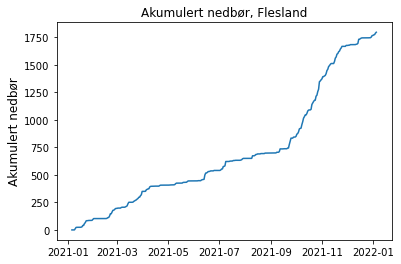

In [18]:
plt.plot(tid, akumulert_nedbør)
plt.title('Akumulert nedbør, Flesland')
plt.ylabel('Akumulert nedbør')
plt.show()

**Metode 2**:
En kombinasjon av en for-løkke of Numpy sin funksjon np.append().

In [19]:
akumulert_nedbør=np.array(([nedbør[0]]))
for i in range(len(nedbør)-1):
    akumulert_nedbør=np.append(
        akumulert_nedbør,akumulert_nedbør[i]+nedbør[i+1]
    )

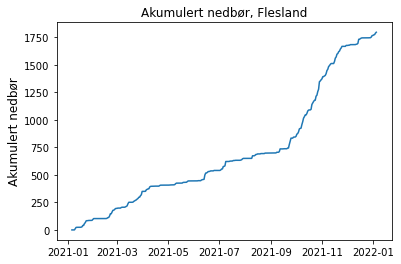

In [20]:
plt.plot(tid, akumulert_nedbør)
plt.title('Akumulert nedbør, Flesland')
plt.ylabel('Akumulert nedbør')
plt.show()

**Metode 3**: Med den innebygde funksjonen `np.cumsum()` fra `numpy`.

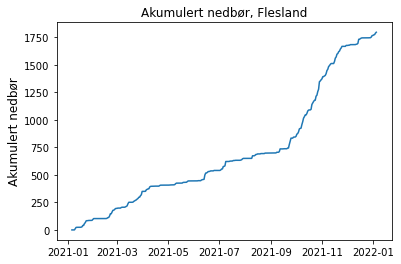

In [21]:
akumulert_nedbør=np.cumsum(nedbør) # Cumulative sum
plt.plot(tid, akumulert_nedbør)
plt.title('Akumulert nedbør, Flesland')
plt.ylabel('Akumulert nedbør')
plt.show()

**Notat om å bruke innebygde funksjoner**: Det er alltid flere muligheter for å komme frem til samme svar. Det kan være både befriene og frustrerende at det ikke alltid finnes en fasit. Når det kommer til innebygde funksjoner, slik som `np.cumsum` i eksempelet over er det en god regel å bruke disse. Det er lett å gjøre småfeil selv, men når man bruker funksjonene til disse store bibliotekene kan man være nokså sikre på at eventuelle feil er luket ut fordi det er så utrolig mange som bruker disse funksjonene. Om det var en feil i funksjonen ville nok noen funnet den allerede, gitt beskjed, og fått det fikset (dette er det som gjør open source så bra!). 

**Tips**: Den kan være god programmerings-trening å øve seg på å gjøre slike beregninger (som f.eks. akumulert sum) manuelt fordi `Numpy` har en fasit å sammenligne med.

## Oppgave 2

1) Beregn gjennomsnittstemperaturen til de ti første dagene med numpy sin funksjon `np.mean()`.

In [22]:
np.mean(nedbør[:10])

2.3899999999999997

2) Beregn gjennomsnittstemperaturen til de ti første dagene på en annen måte.

In [23]:
np.sum(nedbør[:10])/len(nedbør[:10])

2.3899999999999997

In [24]:
1/10*(
    nedbør[0]+nedbør[1]+nedbør[2]+nedbør[3]+nedbør[4]
    +nedbør[5]+nedbør[6]+nedbør[7]+nedbør[8]+nedbør[9]
)

2.39

In [25]:
nedbørsum=nedbør[0]
for i in range(9):
    nedbørsum=nedbørsum+nedbør[i+1]
    
nedbørsum/10

2.3899999999999997

Å bruke Numpy sin innebygde funksjon er absolutt enklest og sikrest. 

## Del 6: Kontrollsjekk
Det er imidlertid alltid bra å være litt skeptisk. Hvordan stemmer tidsserien av akumulert nedbør overens med figuren over daglig nedbør? Ser det ut til at beregningen er rett?

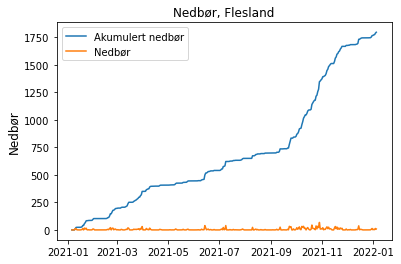

In [26]:
plt.plot(tid, akumulert_nedbør, label='Akumulert nedbør')
plt.plot(tid, nedbør, label='Nedbør')
plt.title('Nedbør, Flesland')
plt.ylabel('Nedbør')
plt.legend()
plt.show()

Det er veldig vanskelig å se når støreelsesordenen til nedbør og akumulert nedbør er så forskjellig. Vi prøver på nytt.

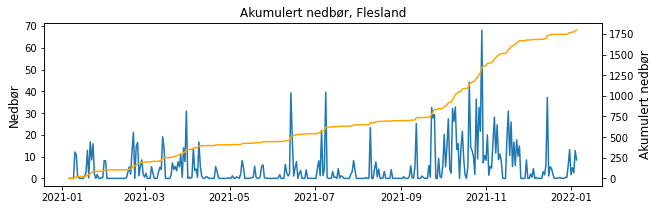

In [27]:
# Definer figur størrelse og kall aksene "ax1"
fig, ax1 = plt.subplots(figsize=(10,3))

# Lag et sett med nye akser som er like som "ax1". Y-aksen til ax2
# legger seg automatisk til høyre. 
ax2 = ax1.twinx()

# plot nedbør langs den venstre y-aksen
ax1.plot(tid, nedbør)
# plot akumulert nedbør langs den høyre y-aksen
ax2.plot(tid, akumulert_nedbør, color='orange')

plt.title('Akumulert nedbør, Flesland')
ax1.set_ylabel('Nedbør')
ax2.set_ylabel('Akumulert nedbør')
plt.show()

Nå har vi lagt til en y-akse til høyre. Vi kommer tilbake til denne type figur-tekniske ting seinere. 

Dette ser ganske bra ut: når det regner lite er grafen over akumulert nedbør nesten horisontal. Når det regner mye stiger akumulert nedbør mye. Dette tyder på at beregningen vår er riktig. 

### Del 7: Sammenlign ulike datasett

Det er også ofte interessant å sammenligne ulike variabler. Sol og nedbør er for eksempel sannsynligvis relatert til hverandre: Når det er mye sol er det sannsynlig at det ikke regner så mye. Vi kan sammenligne grafene for å gjøre en kjapp sjekk:

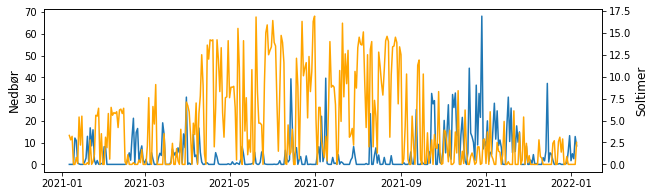

In [28]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør)
ax2.plot(tid, sol, color='orange')
ax1.set_ylabel('Nedbør')
ax2.set_ylabel('Soltimer')
plt.show()

Ved første øyekast ser dette ut omtrent som forventet, spesielt frem til ca september. Her øker variabiliteten og det blir vanskeligere å se et system mellom de blå og gule linjene. Å zoome in kan helpe:

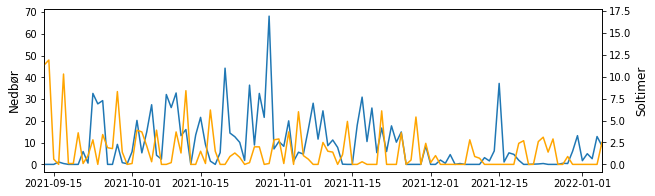

In [29]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør)
ax2.plot(tid, sol, color='orange')
# zoom in ved å endre grensene til x-aksen
plt.xlim(tid[250], tid[-1])
ax1.set_ylabel('Nedbør')
ax2.set_ylabel('Soltimer')
plt.show()

Det er fremdeles ikke et helt entydig mønster mellom variasjon i nedbør og soltimer i denne biten av datasettet. Det tyder på at det er flere ting som påvirker antall soltimer enn om det er regnskyer tilstede. Og dette stemmer med hva vi kan observerer her i Bergen: Man kan ha sol og regn om hverandre i løpet av en og samme dag, og enda mer typisk: byen er ofte dekket av et grått skydekke uten at det regner noe særlig. 

I tillegg er antall soltimer på en dag avhengig av sesongen. Å lage en hypotese om at det generelt regner lite når antall soltimer i løpet av en dag er over 10 timer gir for eksempel ikke mening om vinteren. Det er med andre ord viktig å ikke glemme de naturlige prosessene som ligger bak tallverdiene i datasettet man ser på!

### Del 8: Undesøk en hypotese: hvordan henger sol, temperatur og nedbør sammen?

Tilsvarende kan vi sammenligne nedbør og temperatur. Fra naturfag vet vi at varm luft kan holde på mer fuktighet, så vi kan lage en hypotese om at det regner mer når det er varmt: i) Det er varmt, så luften holder på mye fuktighet, ii) luften treffer fjellene i Bergen og blir presset opp dit der er kaldere, iii) det begynner å regne. Støtter datasettet vårt denne hypotesen?

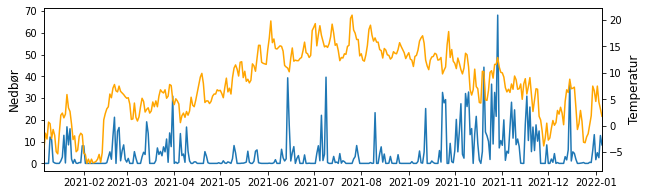

In [30]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør)
ax2.plot(tid, temp, color='orange')
plt.xlim(tid[0], tid[-1])
ax1.set_ylabel('Nedbør')
ax2.set_ylabel('Temperatur')
plt.show()

Ved første øyekast er svaret kanskje "nei: det regner ikke mer når det er varmt". Men ser man nærmere på dette er svaret litt mer innviklet. I starten og slutten av perioden ser det faktisk ut som om at hypotesen kan ha noe for seg. I februar er det for eksempel en veldig kald periode med veldig lite regn. Husk tilbake til figuren over solinnstrålingen: Denne perioden hadde også mye sol (for årstiden). Og dette er vintervær i kjenner til: kaldt, tørt, og sol!

I juni er det imidlertid helt motsatt: Det var varmt og det regnet nesten ingenting. Og dette er sommervær vi kjenner til: varmt, tørt, og sol!

Vi plotter alle tre tidsseriene sammen.

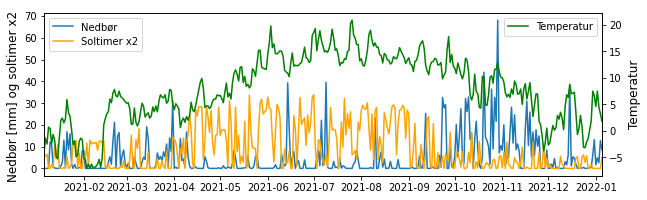

In [31]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør, label='Nedbør')
# Vi gjør en quick-fix: multipliser antall soltimer med 2 for at verdiene
# passer inn på aksen til nedbør. Dette ville ikke vært OK om figuren 
# skulle publiseres, men nå når vi kun skal få et intrykk av variabiliteten
# til variablene er det OK. 
ax1.plot(tid, sol*2, color='orange', label='Soltimer x2')
ax2.plot(tid, temp, color='green', label='Temperatur')
plt.xlim(tid[0], tid[-1])
ax1.set_ylabel('Nedbør [mm] og soltimer x2 ')
ax2.set_ylabel('Temperatur')
ax1.legend(loc='upper left')
ax2.legend()
plt.show()

Det virker som om at sammenhengen mellom nedbør og temperatur er sesongavhengig. Vi må modifisere hypotesen vår. En ny hypotese kan være: Om sommeren regner det mer når det er kaldt, mens om vinteren regner det mer når det er varmt. Men er det egentlig slik at det regner mer når det er kaldt om sommeren, eller blir det kaldt når det regner..? 
_________
**Notat: Python + naturfag**

Å analysere datasett som dette er nyttig for å undersøke spørsmål som de vi undersøker over, men det er helt nødvendig å sette dataanalysen som vi gjør Python i sammenheng med teorien vi har fra naturfag. 

Hvis ikke er det nokså umulig å lage gode og nyttige problemstillinger på plass før man setter i gang med programmeringen. 

Å undersøke datasett slik som over kan imidlertid også sette oss på sporet av interessante spørsmål vi ikke ville kommet på dersom vi ikke kunne visualisere og undersøke dataene slik som vi kan med Python. 

## Oppgave 3
I cellen under er et eksempel på en annen måte man kan sammenligne variabler: scatterplot. I denne figuren plottes et punkt for hvert (x,y)-par. Dette gjør at man kan vurdere om det er et fast forhold mellom variablene, for eksempel om det er varmt når det er mye sol. 

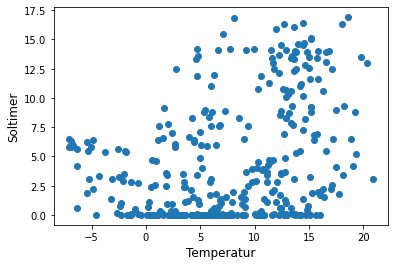

In [32]:
plt.scatter(temp, sol)
plt.ylabel('Soltimer')
plt.xlabel('Temperatur')
plt.show()

**Spørsmål 1**
- Hvilken sammenheng ser du mellom soltimer og temperatur? 
- Hvorfor er det så tett med datapunk langs bunnen av plottet?
- Hva er felles for dagene med aller kaldest og aller varmest temperaturer?

### Fargekod prikkene
Scatterplot blir enda mer nyttig om man fargekoder prikkene. I dette tilfellet har vi fire variabler: Temperatur, soltimer, nedbør, og tid. Siden vi nå ser på temperatur vs soltimer kan vi fargekode prikkene med nedbør eller tid. Vi prøver tid først:

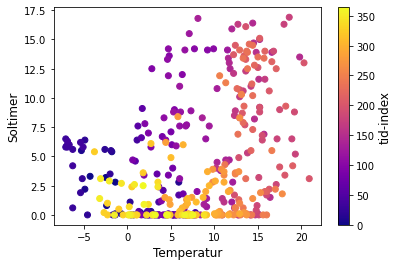

In [33]:
# Denne pakken trengs for å lage fargeskalaen
from matplotlib import cm 

# cmap står for "colormap". Her definerer du hvilken fargeskala du 
# vil bruke. Finn flere navn her: https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmap=cm.get_cmap('plasma', len(nedbør))

# Her definerer du at fargeskalaen skal basere seg på lengden til
# tidsvektoren din
colors = range(len(tid))

# Lag akser
ax=plt.axes()

# plot punktene, og lagre scatterplottet til variabelen "sc"
sc=ax.scatter(
    temp, sol, 
    c=colors, cmap=cmap, 
    vmin=min(colors), vmax=max(colors)
)

# denne linjen gjør at fargeskalaen vises. For å lage denne trenger du "sc"
plt.colorbar(sc, label='tid-index') 
plt.ylabel('Soltimer')
plt.xlabel('Temperatur')
plt.show()

Denne koden er en del mer komplisert, men det eneste som skjer er at du
- lager et fargekart som er like langt som dataene dine
- bestemmer hvilken variabel du vil basere fargen til prikkene på
- gir ekstra informasjon til scatter-funksjonen
    - c: hvilken variabel som skal definere fargen på prikkene
    - vmin: nedre grense til fargeskalaen
    - vmax: øvre grense til fargeskalaen
- legger til en fargeskala

**Spørsmål 2**
- Hva mer kan du si om forholdet mellom Temperatur or soltimer nå som du vet at lilla er januar og gul er desember?

## Oppgave 4
- Lag et nytt scatterplot uten fargekode på prikkene. Velg selv hvilke variabler du vil sammenligne: soltimer vs nedbør eller temperatur vs nedbør.
- Hvilken sammenheng ser du mellom variablene? Stemmer det overens med hypotesene vi hadde over?

- Lag et scatterplot over de samme variablene, og fargekod prikkene med tid eller soltimer/temperatur. 
- Hvilken ny informasjon fikk du nå? 
- Hva ser du som er overraskende, eller som du ikke skjønner hvorfor er som det er? Hvordan kan du jobbe videre for å finne ut av sammenhengene/detaljene du ikke forstår?